In [124]:
import numpy as np
import matplotlib.pyplot as pl


## FF=0

In [151]:
data = np.loadtxt('./results/BF_scaling_220_ALL.dat')
idx = data.T[0]<250
[SNRtot_MF, log_BF, occams, mass_in_solar, chi_inject] = data.T[:,idx]

In [152]:
coeff, err = np.polyfit(SNRtot_MF, log_BF, deg=2, cov=True)
print(r'Quadratic coefficient = %.5f +- %.5f' % (coeff[0], np.sqrt(err[0,0])))

Quadratic coefficient = 0.50001 +- 0.00005


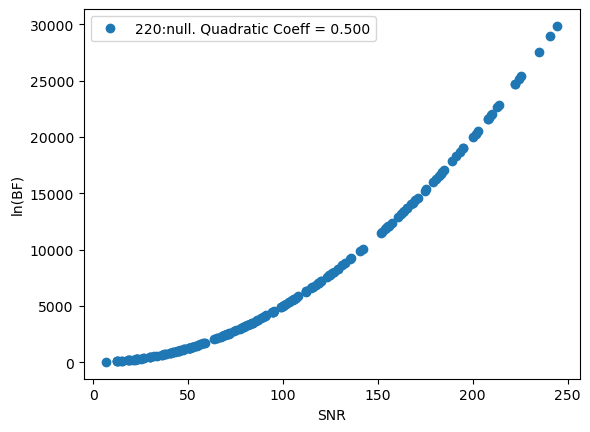

In [153]:
# data = np.loadtxt('./results/BF_scaling_220+221_ALL.dat')
# [SNRtot_MF, log_BF, occams, mass_in_solar, chi_inject] = data.T

# pl.plot(SNRtot_MF, log_BF, 'o', label="220:null. Quadratic Coeff = 0.500")
# pl.xlabel("SNR")
# pl.ylabel("ln(BF)")
# pl.legend()

# data = np.loadtxt('./results/large_injection_space_220_ALL.dat')
# [SNRtot_MF, log_BF, occams, mass_in_solar, chi_inject] = data.T

pl.plot(SNRtot_MF, log_BF, 'o', label="220:null. Quadratic Coeff = %.3f" % coeff[0])
pl.xlabel("SNR")
pl.ylabel("ln(BF)")
pl.legend()

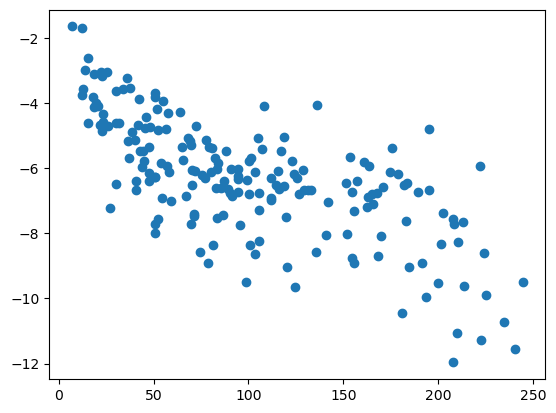

In [156]:
pl.plot(SNRtot_MF, np.log(occams), 'o')

In [129]:
# Suppress linear term
from scipy.optimize import curve_fit

func = lambda x, a, b: a*x**2 + b
fit = curve_fit(func, SNRtot_MF, log_BF)
fit

(array([ 0.49994773, -4.81722154]),
 array([[ 2.19381778e-10, -3.11119738e-06],
        [-3.11119738e-06,  9.55872664e-02]]))

Text(0, 0.5, 'PDF')

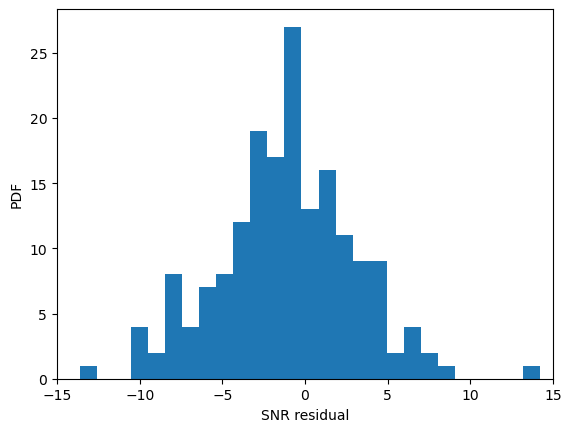

In [130]:
residual = 2*(log_BF-np.log(occams)) - SNRtot_MF**2
pl.hist(residual, bins=30);
pl.xlim(-15, 15)
pl.xlabel("SNR residual")
pl.ylabel("PDF")

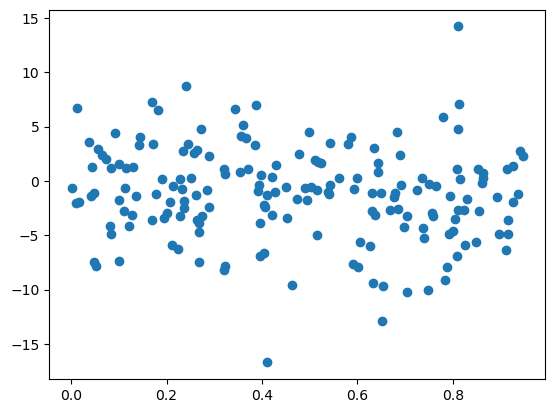

In [122]:
pl.plot(chi_inject, residual, 'o')

## FF != 0

In [173]:
data = np.loadtxt('./results/BF_scaling_allFixed_220+221:220_ALL.dat')
idx = data.T[0]<250
[SNRtot_MF, evidence_inj, evidence_filt, nofilter, \
occams_inj,occams_filt, mass_in_solar, chi_inject] = data.T[:,idx]

log_BF = evidence_inj - evidence_filt
coeff, err = np.polyfit(SNRtot_MF, log_BF, deg=2, cov=True)
print(r'Quadratic coefficient = %.5f +- %.5f' % (coeff[0], np.sqrt(err[0,0])))

Quadratic coefficient = 0.00181 +- 0.00015


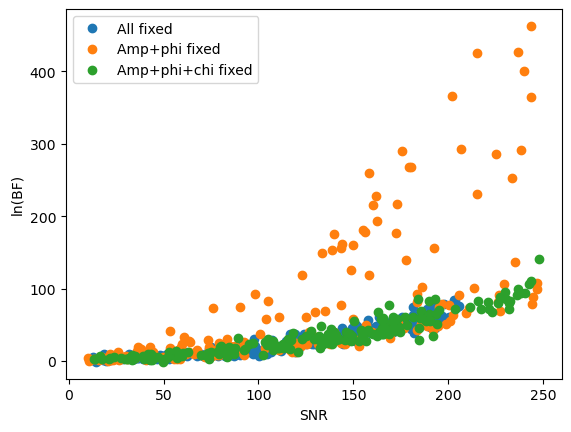

In [176]:
data = np.loadtxt('./results/BF_scaling_allFixed_220+221:220_ALL.dat')
idx = data.T[0]<250
[SNRtot_MF, evidence_inj, evidence_filt, nofilter, \
occams_inj,occams_filt, mass_in_solar, chi_inject] = data.T[:,idx]
log_BF = evidence_inj - evidence_filt
pl.plot(SNRtot_MF, log_BF, 'o', label="All fixed")


data = np.loadtxt('./results/BF_scaling_phiFixed_ampFixed_220+221:220_ALL.dat')
idx = data.T[0]<250
[SNRtot_MF, evidence_inj, evidence_filt, nofilter, \
occams_inj,occams_filt, mass_in_solar, chi_inject] = data.T[:,idx]
log_BF = evidence_inj - evidence_filt
pl.plot(SNRtot_MF, log_BF, 'o', label="Amp+phi fixed")

data = np.loadtxt('./results/BF_scaling_phiFixed_chiFixed_ampFixed_220+221:220_ALL.dat')
idx = data.T[0]<250
[SNRtot_MF, evidence_inj, evidence_filt, nofilter, \
occams_inj,occams_filt, mass_in_solar, chi_inject] = data.T[:,idx]
log_BF = evidence_inj - evidence_filt
pl.plot(SNRtot_MF, log_BF, 'o', label="Amp+phi+chi fixed")

pl.xlabel("SNR")
pl.ylabel("ln(BF)")
pl.legend()